# Tutorial9_Submission

This notebook will contain my submission for tutorial 9

# Libraries

In [19]:
# system libraries

import sys
sys.path.insert(0,'..')

# mathematical

import numpy as np

# data exploration

import pandas as pd

# data visualisation

import matplotlib.pyplot as plt
from Extra_Work.PythonFiles.plotting import plot_classes
from Extra_Work.PythonFiles.plotting import gridspacer, reshape_by_component
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# modelling

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# other configuration

plt.style.use('ggplot')

# Task (A)

We have a circuit to analyse that has two inputs and two outputs. 

Assumptions:
- The inputs are continuous voltages from 0 to 10V
- The outputs are stateless, i.e. no dependence on what happened before

The output voltages explain 1 of 3 classes for the various inputs.

Each of these states is indicated by a combination of the voltages.

The first task, Task (A) requires you to find the combinations which make 3 distinct classes.

In [2]:
# import data
path = '../Data/volts.csv'

df = pd.read_csv(path)

df.head()

,x1,x2,y1,y2
0,5.488135,7.482680,6.859985,7.513852
1,7.151894,1.802027,2.087877,6.657288
2,6.027634,3.890231,3.115369,6.099800
3,5.448832,0.376002,6.692478,9.618781
4,4.236548,0.117877,5.557551,7.381141


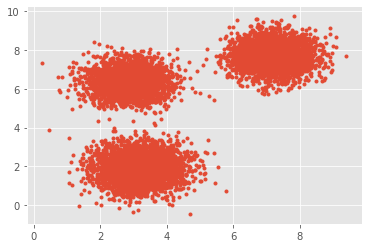

In [3]:
# visualise the points

plt.plot(df['y1'],df['y2'],'.')

This is a classic KMeans problem... we see exactly 3 classes that are not intersecting massively, and therefore we can construct a KMeans object that can classify the centres of these classes. Each centre would then provide the 'voltages' that make up the classes, plus a certain level of uncertainty (the standard deviation). The latter can be analysed later.

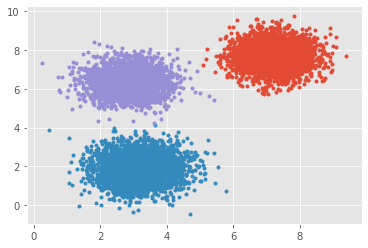

In [4]:
# define data
X = np.asarray(df[['y1','y2']])

# construct KMeans classifier

model = KMeans(n_clusters = 3)
yhat = model.fit_predict(X)


fig, ax = plot_classes(X, yhat)

In [5]:
# centres
model.cluster_centers_

array([[7.19831173, 7.70619219],
       [3.19462558, 1.91429061],
       [2.88507126, 6.39672699]])

In [6]:
df['y'] = yhat
df.head()

,x1,x2,y1,y2,y
0,5.488135,7.482680,6.859985,7.513852,0
1,7.151894,1.802027,2.087877,6.657288,2
2,6.027634,3.890231,3.115369,6.099800,2
3,5.448832,0.376002,6.692478,9.618781,0
4,4.236548,0.117877,5.557551,7.381141,0


# Task (B)

Create a classifier, based on y, using a random forest with 100 trees and max depth = 20. Once done, create a contour plot of the decision function.

In [7]:
rf = RandomForestClassifier(max_depth = 20)

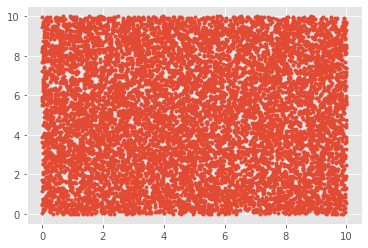

In [8]:
y = np.asarray(df['y'])
X = np.asarray(df[['x1','x2']])
plt.plot(X[:,0],X[:,1],'.')

In [9]:
rf.fit(X,y)

RandomForestClassifier(max_depth=20)

In [44]:
lines, Xgrid, axes = gridspacer([0,10,200],[0,10,200])

#classes = rf.predict(Xgrid)
p = rf.predict(Xgrid)

p = reshape_by_component(p, *axes)

# verify

classes = rf.predict(X)
(classes == y).sum()/classes.shape

array([0.9616])

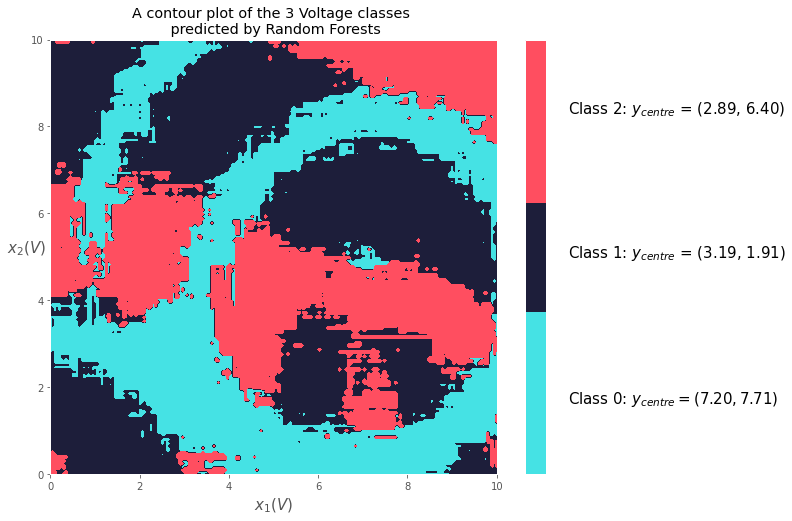

In [45]:
fig, ax = plt.subplots(figsize = (10,8))

cMap = ListedColormap([ '#45e2e4','#1d1e3a','#ff4e60'])

plt.contourf(*axes, p, cmap = cMap)
plt.title('A contour plot of the 3 Voltage classes \n predicted by Random Forests')
plt.xlabel('$x_1 (V)$',fontsize = 15)
plt.ylabel('$x_2 (V)$', fontsize = 15, rotation = 360)
#discrete color scheme
"""
#data
np.random.seed(42)
data = np.random.rand(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=cMap)"""

#legend
cbar = plt.colorbar()

cbar.ax.get_yaxis().set_ticks([])
cbar.ax.text(4, 0.33,'Class 0:$\,\,y_{centre} = (7.20, 7.71)$', fontsize = 15) 
cbar.ax.text(4, 1,'Class 1:$\,\,y_{centre}$ = (3.19, 1.91)', fontsize = 15)
cbar.ax.text(4, 1.66,'Class 2:$\,\,y_{centre}$ = (2.89, 6.40)', fontsize = 15)





plt.show()

# Task (C)

Using NearestNeighber, classify across the same domain

In [42]:
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X, y)

p = nbrs.predict(Xgrid)

p = reshape_by_component(p, *axes)

classes = nbrs.predict(X)
(classes == y).sum()/classes.shape

array([1.])

Text(4, 1.66, 'Class 2:$\\,\\,y_{centre}$ = (2.89, 6.40)')

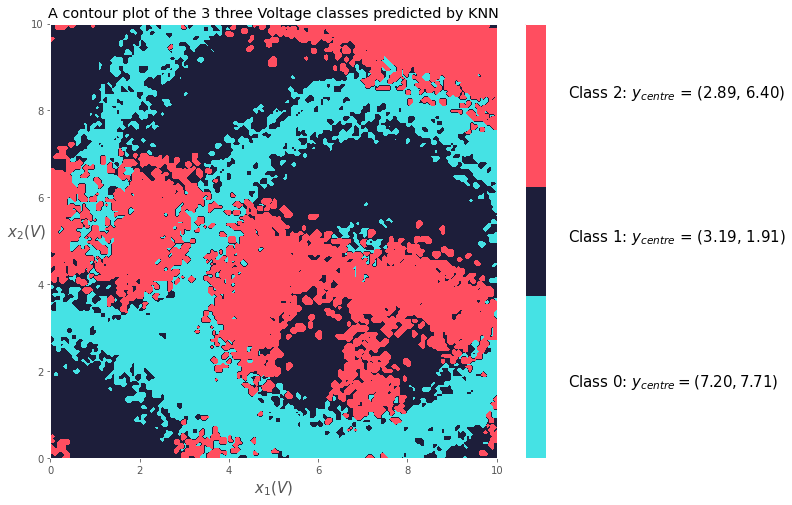

In [43]:
fig, ax = plt.subplots(figsize = (10,8))

cMap = ListedColormap([ '#45e2e4','#1d1e3a','#ff4e60'])

plt.contourf(*axes, p, cmap = cMap)
plt.title('A contour plot of the 3 three Voltage classes predicted by KNN')
plt.xlabel('$x_1 (V)$',fontsize = 15)
plt.ylabel('$x_2 (V)$', fontsize = 15, rotation = 360)

cbar = plt.colorbar()

cbar.ax.get_yaxis().set_ticks([])
cbar.ax.text(4, 0.33,'Class 0:$\,\,y_{centre} = (7.20, 7.71)$', fontsize = 15) 
cbar.ax.text(4, 1,'Class 1:$\,\,y_{centre}$ = (3.19, 1.91)', fontsize = 15)
cbar.ax.text(4, 1.66,'Class 2:$\,\,y_{centre}$ = (2.89, 6.40)', fontsize = 15)

# Task (D)

- RandomForest has a training accuracy of 100%, which could be indicative of overfitting (visually inspecting the contour plot we see 'rigid' lines which supports this). KNN has a much lower accuracy (87.5%) and takes longer to train.
- Technically should do K-fold to see drops in accuracy

The second question is a bit harder to answer? Would that actually be a regression problem?

In [32]:
# both have a very high accuracy, maybe try traint test split?

In [46]:
names = ['random forest','neighbours']
for name, model in zip(names,[rf, nbrs]):
    accuracies = []
    for i in range(5): #techniclly should use kfold
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        accuracies.append((yhat == y_test).sum()/yhat.shape)
    print('accuracy of {} is: {}'.format(name, sum(accuracies)/len(accuracies)))

accuracy of random forest is: [0.7984]
accuracy of neighbours is: [0.7619]
